# Laboratorio 5: Percepción Remota Aplicada

## Álvaro Paredes (alvaro.paredes@dataobservatory.net) | Javier Lopatin (javier.lopatin@uai.cl)

En este práctico vamos a ver cómo utilizar Jupyter Notebooks con Kernel de Python para remuestrear, alinear y cortar rasters.

Primero, instalaremos las librerias correspondientes:



In [ ]:
%%capture
# Installations
!apt install gdal-bin python-gdal python3-gdal 
!pip install geopandas patool
!pip install xarray rasterio rioxarray xarray-spatial

In [ ]:
# cargamos las librerias en el sistema
import xarray as xr
import rioxarray as riox
import patoolib
import os
import matplotlib.pyplot as plt
import xrspatial as xrs
import numpy as np
from rasterio.enums import Resampling

# función para cargar un raster a la memoria del sistema
def rasterio_open(f):
    return riox.open_rasterio(f)

In [ ]:
# descargamos los datos necesarios para el laboratorio. La dirección de descarga puede ser cambiada
# alternativamente, pueden descargar y extraer los datos de forma manual en el PC
if not os.path.exists('flight_08_northmaule_ortho003-009.tif'):
  !wget https://tests-samples-artifacts.s3.us-west-2.amazonaws.com/flight_08_northmaule_ortho003-009.tif
if not os.path.exists('L8-c2l2-sr_2022-01-31T14 34 12.769798.tif'):
  !wget https://github.com/alvaroparedesl/percepcion_remota/raw/main/Data/Lab05/L8-c2l2-sr_2022-01-31T14%2034%2012.769798.tif
if not os.path.exists('S2_l2a-sr_2022-01-23T14 52 37.tif'):
  !wget https://github.com/alvaroparedesl/percepcion_remota/raw/main/Data/Lab05/S2_l2a-sr_2022-01-23T14%2052%2037.tif

--2022-04-29 02:25:20--  https://tests-samples-artifacts.s3.us-west-2.amazonaws.com/flight_08_northmaule_ortho003-009.tif
Resolving tests-samples-artifacts.s3.us-west-2.amazonaws.com (tests-samples-artifacts.s3.us-west-2.amazonaws.com)... 52.218.241.17
Connecting to tests-samples-artifacts.s3.us-west-2.amazonaws.com (tests-samples-artifacts.s3.us-west-2.amazonaws.com)|52.218.241.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2701715406 (2.5G) [image/tiff]
Saving to: ‘flight_08_northmaule_ortho003-009.tif’

flight_08_northmaul 100%[===================>]   2.52G  20.1MB/s    in 2m 15s  

2022-04-29 02:27:36 (19.1 MB/s) - ‘flight_08_northmaule_ortho003-009.tif’ saved [2701715406/2701715406]

--2022-04-29 02:27:36--  https://github.com/alvaroparedesl/percepcion_remota/raw/main/Data/Lab05/L8-c2l2-sr_2022-01-31T14%2034%2012.769798.tif
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP requ

## Cargar Datos UAV

In [ ]:
uav = f.to_dataset(dim='band') \
 .rename({1: 'R', 2: 'G', 3:'B', 4:'A'})
uav

<xarray.Dataset>
Dimensions:      (x: 33229, y: 22435)
Coordinates:
  * x            (x) float64 -72.14 -72.14 -72.14 ... -72.13 -72.13 -72.13
  * y            (y) float64 -35.26 -35.26 -35.26 ... -35.27 -35.27 -35.27
    spatial_ref  int64 0
Data variables:
    R            (y, x) uint8 ...
    G            (y, x) uint8 ...
    B            (y, x) uint8 ...
    A            (y, x) uint8 ...
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    units:         ('metre', 'metre', 'metre', 'metre')

## Cargar datos Landsat 8 OLI

In [ ]:
L8 = rasterio_open('L8-c2l2-sr_2022-01-31T14 34 12.769798.tif').to_dataset(dim='band') \
  .rename({1: 'coastal', 2: 'blue', 3: 'green', 4: 'red', 5: 'nir08', 6: 'swir16', 7: 'swir22'})
L8

<xarray.Dataset>
Dimensions:      (x: 63, y: 39)
Coordinates:
  * x            (x) float64 2.143e+05 2.144e+05 ... 2.162e+05 2.162e+05
  * y            (y) float64 6.094e+06 6.094e+06 ... 6.093e+06 6.093e+06
    spatial_ref  int64 0
Data variables:
    coastal      (y, x) float64 ...
    blue         (y, x) float64 ...
    green        (y, x) float64 ...
    red          (y, x) float64 ...
    nir08        (y, x) float64 ...
    swir16       (y, x) float64 ...
    swir22       (y, x) float64 ...
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0

## Cargar datos Sentinel 2


In [ ]:
S2 = rasterio_open('S2_l2a-sr_2022-01-23T14 52 37.tif').to_dataset(dim='band') \
  .rename({1: 'B01', 2: 'B02', 3: 'B03', 4: 'B04', 5: 'B05', 6: 'B06', 7: 'B07', 8: 'B08', 9: 'B8A', 10: 'B09', 11: 'B11', 12: 'B12'})
S2

<xarray.Dataset>
Dimensions:      (x: 186, y: 117)
Coordinates:
  * x            (x) float64 2.143e+05 2.143e+05 ... 2.162e+05 2.162e+05
  * y            (y) float64 6.094e+06 6.094e+06 ... 6.093e+06 6.092e+06
    spatial_ref  int64 0
Data variables:
    B01          (y, x) uint16 ...
    B02          (y, x) uint16 ...
    B03          (y, x) uint16 ...
    B04          (y, x) uint16 ...
    B05          (y, x) uint16 ...
    B06          (y, x) uint16 ...
    B07          (y, x) uint16 ...
    B08          (y, x) uint16 ...
    B8A          (y, x) uint16 ...
    B09          (y, x) uint16 ...
    B11          (y, x) uint16 ...
    B12          (y, x) uint16 ...
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0

## Operaciones

### Remuestreo (cambiar resolución)

In [ ]:
scale_factor = 3  # aumentar resolución en 3
L810m = (L8.rio.height * scale_factor, L8.rio.width * scale_factor)

<xarray.Dataset>
Dimensions:      (x: 189, y: 117)
Coordinates:
  * x            (x) float64 2.143e+05 2.143e+05 ... 2.162e+05 2.162e+05
  * y            (y) float64 6.094e+06 6.094e+06 ... 6.093e+06 6.092e+06
    spatial_ref  int64 0
Data variables:
    coastal      (y, x) float64 8.018e+03 8.018e+03 ... 7.632e+03 7.632e+03
    blue         (y, x) float64 8.349e+03 8.349e+03 ... 7.714e+03 7.714e+03
    green        (y, x) float64 9.233e+03 9.233e+03 ... 8.243e+03 8.243e+03
    red          (y, x) float64 9.88e+03 9.88e+03 ... 8.091e+03 8.091e+03
    nir08        (y, x) float64 1.422e+04 1.422e+04 ... 1.396e+04 1.396e+04
    swir16       (y, x) float64 1.472e+04 1.472e+04 ... 1.076e+04 1.076e+04
    swir22       (y, x) float64 1.279e+04 1.279e+04 ... 9.12e+03 9.12e+03
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0


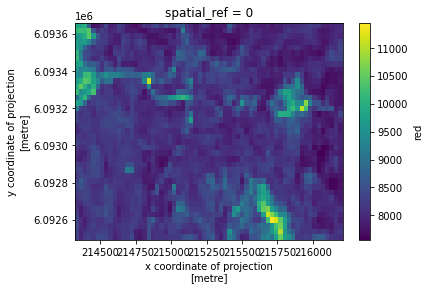

In [ ]:
# cambiar resolución
L8_10 = L8.rio.reproject(L8.rio.crs,
                         shape=L810m,
                         resampling = Resampling.nearest) 
# vizualizar Landsat 8 a 10 m
print(L8_10)
L8_10.red.plot()

<xarray.Dataset>
Dimensions:      (x: 63, y: 39)
Coordinates:
  * x            (x) float64 2.143e+05 2.144e+05 ... 2.162e+05 2.162e+05
  * y            (y) float64 6.094e+06 6.094e+06 ... 6.093e+06 6.093e+06
    spatial_ref  int64 0
Data variables:
    coastal      (y, x) float64 8.018e+03 7.912e+03 ... 7.658e+03 7.632e+03
    blue         (y, x) float64 8.349e+03 8.217e+03 ... 7.778e+03 7.714e+03
    green        (y, x) float64 9.233e+03 9.207e+03 ... 8.34e+03 8.243e+03
    red          (y, x) float64 9.88e+03 9.838e+03 ... 8.158e+03 8.091e+03
    nir08        (y, x) float64 1.422e+04 1.479e+04 ... 1.416e+04 1.396e+04
    swir16       (y, x) float64 1.472e+04 1.480e+04 ... 1.093e+04 1.076e+04
    swir22       (y, x) float64 1.279e+04 1.271e+04 ... 9.09e+03 9.12e+03
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0


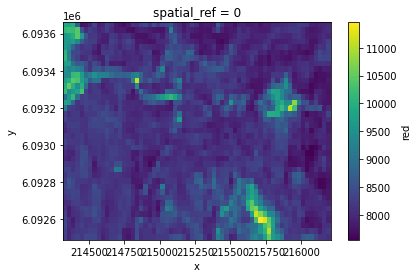

In [ ]:
# vizualizar Landsat 8 original a 30 m
print(L8)
L8.red.plot()

### Hay diferencias visuales entre L8 a 30 y 10 m? Porqué? 

In [ ]:
print(L8_10.rio.transform())
print(L8.rio.resolution())

| 10.00, 0.00, 214320.00|
| 0.00,-10.00, 6093660.00|
| 0.00, 0.00, 1.00|
(30.0, -30.0)


In [ ]:
print(L8_10.rio.resolution())
print(L8.rio.resolution())

(10.0, -10.0)
(30.0, -30.0)


### Alinear rasters

In [ ]:
?L8.rio.reproject # que hace la función reproject? 

In [ ]:
L8a = L8.rio.reproject(S2.rio.crs, 
                       transform=S2.rio.transform(),
                       shape=S2.rio.shape) 
L8a

<xarray.Dataset>
Dimensions:      (x: 186, y: 117)
Coordinates:
  * x            (x) float64 2.143e+05 2.143e+05 ... 2.162e+05 2.162e+05
  * y            (y) float64 6.094e+06 6.094e+06 ... 6.093e+06 6.092e+06
    spatial_ref  int64 0
Data variables:
    coastal      (y, x) float64 8.018e+03 8.018e+03 ... 7.658e+03 7.632e+03
    blue         (y, x) float64 8.349e+03 8.349e+03 ... 7.778e+03 7.714e+03
    green        (y, x) float64 9.233e+03 9.233e+03 ... 8.34e+03 8.243e+03
    red          (y, x) float64 9.88e+03 9.88e+03 ... 8.158e+03 8.091e+03
    nir08        (y, x) float64 1.422e+04 1.422e+04 ... 1.416e+04 1.396e+04
    swir16       (y, x) float64 1.472e+04 1.472e+04 ... 1.093e+04 1.076e+04
    swir22       (y, x) float64 1.279e+04 1.279e+04 ... 9.09e+03 9.12e+03
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0

(10.0, -10.0)


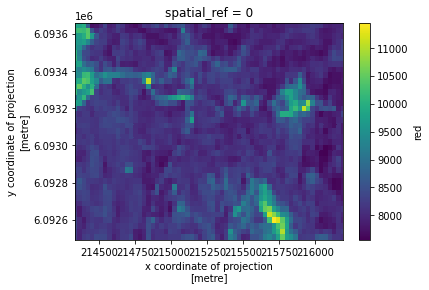

In [ ]:
print(L8a.rio.resolution())
L8a.red.plot()

### Cortar imagen con otra imagen

In [32]:
original_bounds = uav.rio.bounds()
y_or = (original_bounds[0], original_bounds[2])
x_or = (original_bounds[1], original_bounds[3])

In [33]:
from pyproj import Proj, Transformer

transformer = Transformer.from_crs("epsg:4326", "epsg:32719")
x_r, y_r = transformer.transform(x_or, y_or)

In [34]:
L8c = L8.rio.clip_box(x_r[0], y_r[0], x_r[1], y_r[1])

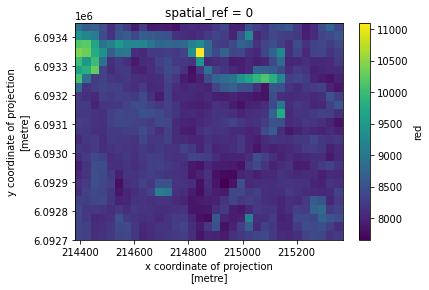

In [35]:
L8c.red.plot()

## Actividades

1. Unir las images con misma resolución y misma extencion usando xr.merge
2. Visualizar sólo los primeros 300 X 300 pixeles de la imágen UAV
3. Cortar la imágen UAV al área de S2
4. Reproyectar S
